# Import Libraries

In [1]:
import os, time, math
from datetime import datetime
from pprint import pprint

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
random_st = 34
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

# Import Data

In [2]:
# Creating the df from excel file
file = 'OSA_propio_classification_speech.csv'
df = pd.read_csv(file)
df.set_index("Patient", inplace=True)
df = pd.get_dummies(df, drop_first=False, columns=["Smoker","Snorer","Illness"])
df = df.drop(["IAH","Gender"],axis=1)
df["OSA"] = (df["OSA"] == "Healthy")
df.head(5)

,Age,Cervical,Weight,Height,BMI,OSA,A_Form1,A_Form2,A_Form3,A_Form4,A_Ancho1,A_Ancho2,A_Ancho3,A_Ancho4,E_Form1,E_Form2,E_Form3,E_Form4,E_Ancho1,E_Ancho2,E_Ancho3,E_Ancho4,I_Form1,I_Form2,I_Form3,I_Form4,I_Ancho1,I_Ancho2,I_Ancho3,I_Ancho4,O_Form1,O_Form2,O_Form3,O_Form4,O_Ancho1,O_Ancho2,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4,Smoker_antiguo,Smoker_no,Smoker_ns,Smoker_si,Snorer_no,Snorer_ns,Snorer_si,Illness_no,Illness_ns,Illness_si
Patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P0005,32.0,40.0,80.0,173.0,26.73,True,746.822118,1225.417574,2508.306857,3775.739467,159.540487,136.262353,210.543171,310.282327,444.329416,1923.198002,2413.099988,3702.694971,91.377736,180.722553,238.645633,297.480200,280.517797,2333.900632,2675.771298,3629.788196,54.768461,197.094863,350.151707,191.838788,521.014667,899.391590,2450.534996,3436.611940,111.113893,105.344590,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142,0,1,0,0,0,1,0,0,0,1
P0006,32.0,42.0,109.0,190.0,30.19,True,741.095216,1194.912057,2535.047408,4342.764233,82.978577,80.387144,169.240894,396.028693,447.590191,1854.870927,2393.710295,3113.232851,46.878312,128.777004,160.033886,101.963048,232.137917,2111.943312,2669.988319,3162.256273,40.262878,77.813226,137.281246,124.477303,469.246667,837.528898,2578.915385,3362.955653,202.989244,167.398362,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720,0,1,0,0,0,1,0,0,0,1
P0007,39.0,42.0,86.0,169.0,30.11,False,681.116563,1345.969619,2647.407542,3547.479088,105.612767,292.676472,207.214787,496.932394,403.945565,2013.252360,2641.697682,3668.224338,50.386443,201.033000,165.732713,232.740020,343.001036,2351.413507,2887.611766,3579.628331,67.618626,76.567953,203.982622,160.827284,478.376311,857.990002,2720.000000,3543.718149,108.333218,108.511394,468.000000,95.059357,370.154253,714.797758,2728.437822,3501.838315,92.078301,230.866726,87.218309,591.651748,0,1,0,0,0,1,0,0,0,1
P0008,47.0,44.0,145.0,172.0,49.01,False,732.652369,1307.902237,2605.230176,3019.018221,202.704817,121.269657,230.876431,708.711232,437.415190,1766.235188,2648.434277,3349.032619,170.260998,68.972074,131.641840,199.257616,275.619298,2149.104460,2913.004884,3454.769958,112.291995,88.601167,220.700581,157.147668,468.828616,833.519477,2730.786499,3345.851672,155.151117,73.004847,107.256636,373.582142,303.000000,757.152778,2317.825661,4068.527272,197.000000,134.369532,190.933843,144.054887,0,1,0,0,0,1,0,0,0,1
P0013,36.0,40.0,90.0,180.0,27.78,True,741.800273,1414.064330,2420.678380,2829.912480,274.364652,142.593395,231.962809,946.517445,435.490170,1955.792869,2470.491852,3623.912057,102.622600,180.300516,231.182421,572.293944,294.290051,2267.937991,3055.267599,3556.005223,51.571960,125.754815,356.643300,254.061218,530.000000,949.832040,2384.671062,3104.531931,171.000000,173.380607,163.917683,174.836713,287.000000,733.000000,2296.000000,2947.386531,74.000000,175.000000,274.000000,189.966079,0,0,1,0,0,1,0,0,1,0


# Helping Functions

In [3]:
def get_date():
    return datetime.today().strftime('%Y-%m-%d_%H:%M:%S')

def insert_result(model,description,precision,recall,f1,acc,c_matrix,roc_auc,interval,date):
    line = ""
    string_features = ""
    conf_values = ""
    for ele in x_features:
        string_features = string_features + "-" + ele
    conf_values = ""
    for ele in c_matrix:
        for l in ele:
            conf_values = conf_values + "-" + str(l)
    for column in [model, description,
                   precision, recall, f1, acc, conf_values[1:], roc_auc,
                   cv_on, feature_on,
                   string_features[1:], len(x_features), len(x_features)>1,
                   poly_on, poly_deg,
                   log_transform_on,
                   minmax_sc_on, standard_sc_on,
                   pca_on, pca_per,
                   interval, date]:
        line = line + "," + str(column)
    os.system("echo " + line[1:] + " >> classification_results.csv")
    

def feature_selection(model, X, y, model_name):
    global x_features
    
    #Fitting feature selection model with our classification model
    rfecv = RFECV(
              estimator=model,
              step=1,
              cv=StratifiedKFold(5),
              scoring='accuracy',
             )
    rfecv.fit(X, y)
    rfe_feature = X.loc[:,rfecv.get_support()].columns.tolist()
    print("X features:", rfe_feature)
    
    #Plotting feature importance graph
    plt.figure(figsize=(12,8))
    ax = sns.lineplot(x=range(1, len(rfecv.grid_scores_) + 1),
                      y=rfecv.grid_scores_,
                      palette="Set2")
    ax.set(xlabel='Number of Features',
           ylabel='CV Score (Accuracy)',
           title='RFECV-based Feature Selection')
    name_fig = model_name + "_" + description + "_" +  date
    if save_model:
        plt.savefig("RFECV_"+name_fig)
    plt.show()
    
    #Changing global value x_feature for the database. (Bad practice)
    x_features = rfe_feature
    return X.loc[:,x_features]
    

    
def fit_model(model, X, y, model_name, description, date):
    
    ### Fitting the model
    
    if(feature_on):
         X = feature_selection(model, X, y, model_name)
        
    start = time.time()
    y_pred = cross_val_predict(model,X,y,cv=cv_on)
    end = time.time()
    
    if model_name not in ["logistic", "sgd", "ridge","svc_linear", "svc","perceptron"]: 
        y_score = cross_val_predict(model,X,y,cv=cv_on,method="predict_proba")
        y_score = y_score[:,1] # score = proba of positive class
    else:
        y_score = cross_val_predict(model,X,y,cv=cv_on,method="decision_function")
    
    
    report = classification_report(y, y_pred, output_dict= True)
    pprint(report, width=1)
    
    c_matrix = confusion_matrix(y, y_pred)
    precision_pred = round(report["weighted avg"]["precision"],3)
    recall_pred = round(report["weighted avg"]["recall"],3)
    f1_pred = round(report["weighted avg"]["f1-score"],3)
    acc_pred = round(report["accuracy"],3)
    roc_auc_pred = round(roc_auc_score(y, y_score),3)
    t = round(end-start,4)
    
    ### Plotting the model
    
    name_fig = model_name + "_" + description + "_" +  date
    
    label1 = "Precision: "+str(precision_pred) + "  Recall: "+str(recall_pred)+"  F1-score: "+str(f1_pred)
    
    precision, recall, thresholds = precision_recall_curve(y, y_score)
    plt.figure(figsize=(8,8))
    plt.plot(recall, precision, linewidth=2, label=label1)
    plt.axis([0, 1, 0, 1])
    plt.title("Precision versus Recall")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.legend(loc="lower right", prop={'size': 12})
    if save_model:
        plt.savefig("versus_"+name_fig)
    plt.show()
    
    label2 = "ROC-AUC: "+str(roc_auc_pred) + "  Accuracy: "+str(acc_pred)+"  Time: "+str(t)+"s"
    
    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, linewidth=2, label=label2)
    plt.plot([0, 1], [0, 1], 'k--', color="C1")
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr, tpr, alpha=0.2, color='b')
    plt.legend(loc="lower right", prop={'size': 12})
    if save_model:
        plt.savefig("ROC_"+name_fig)
    plt.show()
    
    if model_name in ["extra_tree","tree"]:
        sns.reset_orig()
        tree_reg = model.fit(X,y)
        plt.figure(figsize=(10,10))
        plot_tree(tree_reg, filled=True, rounded=True)
        if save_model:
            plt.savefig("tree_"+name_fig)
        plt.show()
        
    return precision_pred, recall_pred, f1_pred, acc_pred, c_matrix, roc_auc_pred, t

# Global Parameters

In [4]:
#Feature Selection. Future versions: Filtering and Embedding
#USE SCALERS BEFORE Feature Selection -> Convergence Warning
x_features = list(df)
x_features.remove("OSA")
#["Age","Cervical","Weight","Height", "BMI"]
y_features = ["OSA"]
feature_on = True

#Data Transformations. Future versions: Square root, natural and max scaler
poly_on, poly_deg = False, 2
log_transform_on = False
minmax_sc_on = True
standard_sc_on = False

#Dimensionality reduction. Future versions: Manifold
#USE SCALERS BEFORE PCA -> feature dispairity
pca_on = False
pca_per = 0.8

#Cross Validation. Future versions: GridSearchCV, RandomSearchCV
cv_on = 10 #1 for no cv

# Data Transformation

In [5]:
X = df[x_features] 
y = np.reshape(df[y_features].values, (len(df[y_features]),))

if len(x_features)==1:
    X = np.reshape(df[x_features].values, (len(df[x_features]), 1))    
    
if poly_on:
    poly_features = PolynomialFeatures(degree=poly_deg, include_bias=False)
    X = poly_features.fit_transform(X)
    
if log_transform_on:
    if len(x_features)==1:
        X = np.log10(X + 1)
    else:
        X[X.select_dtypes(include='float64').columns] = np.log10(X[X.select_dtypes(include='float64').columns] + 1)
    
if minmax_sc_on:
    sc_x, sc_y = MinMaxScaler(), MinMaxScaler()
    X = sc_x.fit_transform(X)
    X = pd.DataFrame(data=X, columns=x_features)

    
if standard_sc_on:
    sc_x, sc_y = StandardScaler(), StandardScaler()
    X = sc_x.fit_transform(X)
    X = pd.DataFrame(data=X, columns=x_features)
    
if pca_on:
    pca = PCA(pca_per) 
    X = pca.fit_transform(X)

# Model Dictionary

In [6]:
reg_models={
    #Classical models: logistic, SGD
    "logistic": LogisticRegression(C=0.01, #All hyperparameters gave same result
                                   penalty='l2',
                                   solver="saga"),  
    "sgd": SGDClassifier(loss='log', #It needs scaling to work properly 
                         penalty='l1'), #l1 works better than l2
                                        #High variability in results.
    #Naive Bayes: Bernoulli and Gaussian
    "nb_bernoulli": BernoulliNB(alpha=1),
    "nb_gaussian": GaussianNB(),
    #Regularizers: Ridge
    "ridge": RidgeClassifier(alpha=1,
                       solver="lsqr"),
    #kNN models
    "knn": KNeighborsClassifier(n_neighbors=15),
    #Tree-based models
    "tree": DecisionTreeClassifier(#max_depth=3,
                                    min_samples_split=15,
                                    min_samples_leaf=15,
                                    max_leaf_nodes=None,
                                    random_state=random_st),
    "extra_tree": ExtraTreeClassifier(#max_depth=3,
                                      #min_samples_split=15,
                                      #min_samples_leaf=15,
                                      max_leaf_nodes=None,
                                      random_state=random_st),
    #Ensemble models
    "bagging": BaggingClassifier(base_estimator=LogisticRegression(),
                                    n_estimators=300,
                                    max_samples=50,
                                    n_jobs=-1),
    "randomforest": RandomForestClassifier(n_estimators=500,
                                           max_leaf_nodes=16),
    "adaboost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                   n_estimators=100,
                                   learning_rate=0.001),
    "gradientboost": GradientBoostingClassifier(max_depth=1,
                                                n_estimators=100), 
                                                #early stooping for best 
                                                #numer of trees
    "xgboost": XGBClassifier(max_depth=1,
                             learning_rate=0.5,
                             n_estimators=100),
    #Support Vector Machines. ENABLE STANDARD SCALER!!!
    "svc_linear": LinearSVC(C=0.001,
                            loss="hinge"),
    "svc": SVC(kernel="rbf",
               probability=False,
               degree=2,
               C=1),
    #Neural Networks
    "perceptron": Perceptron(penalty="l2",
                             early_stopping=False),
    "mlp": MLPClassifier(hidden_layer_sizes=(30,10, ),
                        activation='relu',
                        solver='adam'
                        ),
}

# Model Fit & Results

Model: ridge - 30-10reluAdam
X features: ['Cervical', 'A_Ancho2']


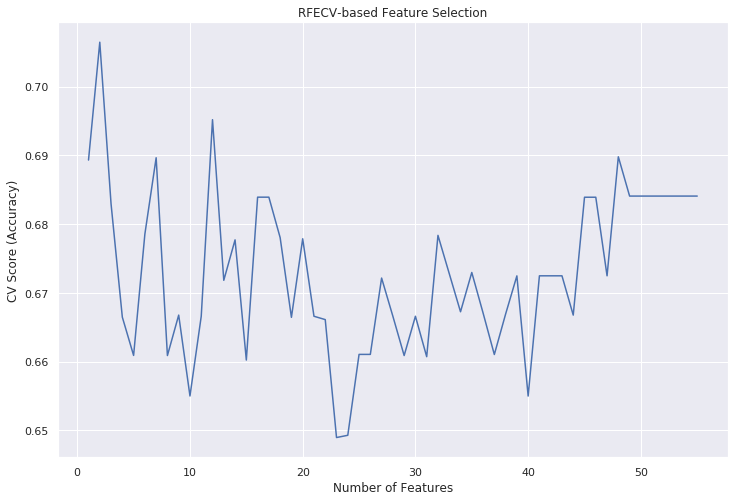

{'False': {'f1-score': 0.6962025316455697,
           'precision': 0.7333333333333333,
           'recall': 0.6626506024096386,
           'support': 83},
 'True': {'f1-score': 0.7473684210526317,
          'precision': 0.7171717171717171,
          'recall': 0.7802197802197802,
          'support': 91},
 'accuracy': 0.7241379310344828,
 'macro avg': {'f1-score': 0.7217854763491007,
               'precision': 0.7252525252525253,
               'recall': 0.7214351913147095,
               'support': 174},
 'weighted avg': {'f1-score': 0.7229617036917917,
                  'precision': 0.7248809938465111,
                  'recall': 0.7241379310344828,
                  'support': 174}}


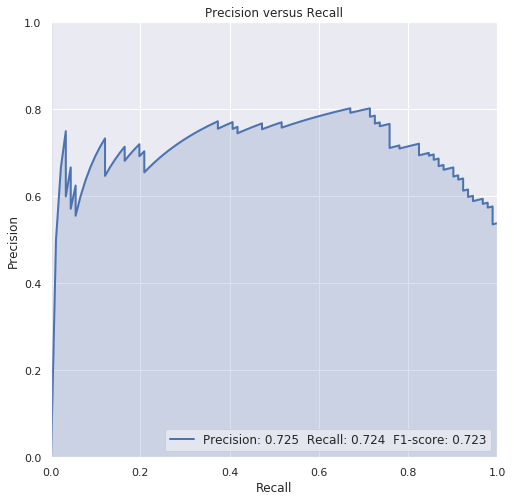

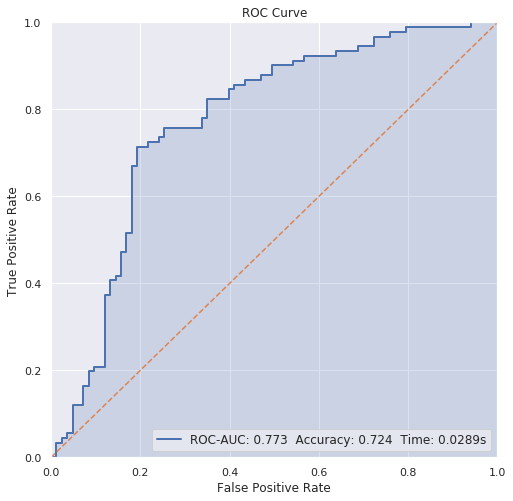

In [7]:
model, description = "ridge", "30-10reluAdam"
save_model, date = False, get_date()

print("Model:",model,'-',description)

precision, recall, f1, accuracy, c_matrix, roc_auc, interval = fit_model(reg_models[model], X, y,model,description,date)

if save_model:
    insert_result(model,description,precision,recall,f1,accuracy,c_matrix,roc_auc,interval,date)